# Fil Rouge Séries Temporelles

- Toumji Abdallah
- Racine Dialo Mamadou
- Boutlendj Melissa
- Ikerrouyene Kahina

### Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from tensorboard.notebook import display
import warnings

## Data preparation
### Dataset importation

We chose to study the yearly dataset and we chose 100 random sample

In [10]:
data_train = pd.read_csv("data/Quarterly-train.csv")
data_test = pd.read_csv("data/Quarterly-test.csv")
info = pd.read_csv("data/m4_info.csv")

data100 = data_train.sample(100, random_state=42)
data100.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V858,V859,V860,V861,V862,V863,V864,V865,V866,V867
3111,Q3112,8570.000000,8690.000000,8930.000000,8950.000000,9090.000000,9150.000000,9270.000000,9250.000000,9270.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18679,Q18680,550.000000,540.000000,620.000000,610.000000,1150.000000,1150.000000,1250.000000,1240.000000,1150.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17472,Q17473,7300.000000,7100.000000,7200.000000,6800.000000,6600.000000,6800.000000,6800.000000,7200.000000,7300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21451,Q21452,1498.089281,1335.796388,1648.872826,1665.729451,1598.708838,1575.537824,1618.112742,1601.217064,1507.948723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20800,Q20801,95.000000,96.000000,99.000000,102.000000,103.000000,106.000000,111.000000,118.000000,127.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning and formating data

We formatted the data to pivot from a wide format to a long format.

We also dropped the lines with the N/A value as indicated as they just mean that there is no more values

In [11]:
data_clean = data100.melt(id_vars='V1', var_name='V', value_name='VALUE')

data_clean['TIME'] = data_clean['V'].str[1:].astype(int) -1

data_clean = data_clean.rename(columns={'V1': 'ID'})

data_clean = data_clean.dropna(subset=['VALUE'])

data_clean = data_clean.sort_values(['ID', 'TIME'])

data_clean['TIME'] = data_clean.groupby('ID').cumcount() + 1

data_clean = data_clean[['ID', 'TIME', 'VALUE']].reset_index(drop=True)

print(data_clean.head(10))


      ID  TIME   VALUE
0  Q1053     1   928.0
1  Q1053     2   982.0
2  Q1053     3  1025.0
3  Q1053     4  1021.0
4  Q1053     5  1041.0
5  Q1053     6  1041.0
6  Q1053     7  1017.0
7  Q1053     8  1065.0
8  Q1053     9  1027.0
9  Q1053    10  1016.0


### Quick Data Analysis

In [4]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

unique_ids = data_clean['ID'].unique()

for uid in unique_ids:

    single_series = data_clean[data_clean['ID'] == uid].sort_values('TIME')

    y = single_series['VALUE']

    model = ARIMA(y, order=(1,1,1))
    model_fit = model.fit()

    print(model_fit.forecast(steps=3))

39    1089.544894
40    1081.000175
41    1089.544719
Name: predicted_mean, dtype: float64
67    8622.997906
68    8621.680642
69    8621.781773
Name: predicted_mean, dtype: float64
74    1014.567111
75    1013.869220
76    1013.845383
Name: predicted_mean, dtype: float64
66    5553.259504
67    5494.771031
68    5517.537654
Name: predicted_mean, dtype: float64
114    15623.279869
115    15623.270083
116    15623.270098
Name: predicted_mean, dtype: float64
102    6817.402110
103    6873.509730
104    6886.654484
Name: predicted_mean, dtype: float64
87    6248.171742
88    6252.034597
89    6250.128471
Name: predicted_mean, dtype: float64
108    7740.481640
109    7745.460697
110    7746.659939
Name: predicted_mean, dtype: float64
55    4625.892559
56    4620.659742
57    4619.985423
Name: predicted_mean, dtype: float64
68    1806.666785
69    1809.805276
70    1811.915963
Name: predicted_mean, dtype: float64
62    1520.090157
63    1520.099801
64    1520.100833
Name: predicted_mean, dt

### Data visualization

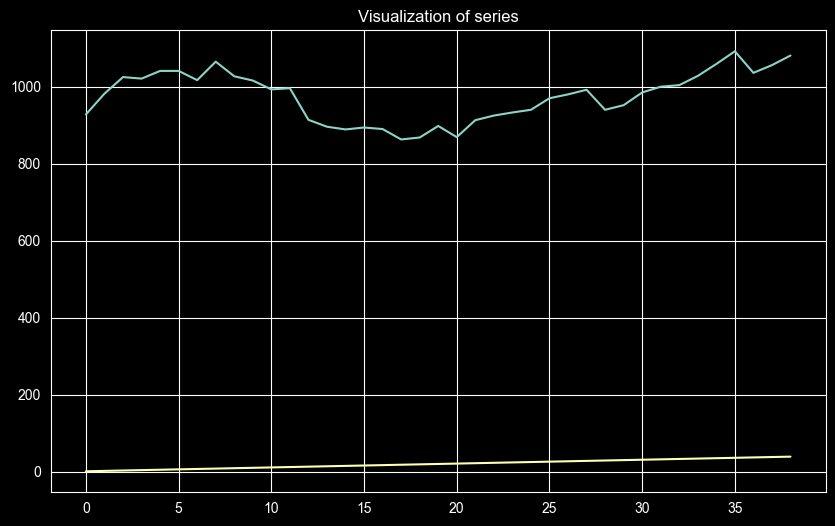

In [5]:
def plot_series(series):
    plt.figure(figsize=(10,6))
    plt.plot(series)
    plt.title("Visualization of series")
    plt.show()

first_quarterly = data_clean[data_clean['ID'] == data_clean['ID'].unique()[0]]

plot_series(first_quarterly[['VALUE', 'TIME']])

### Seasonal decomposition


<Figure size 1200x800 with 0 Axes>

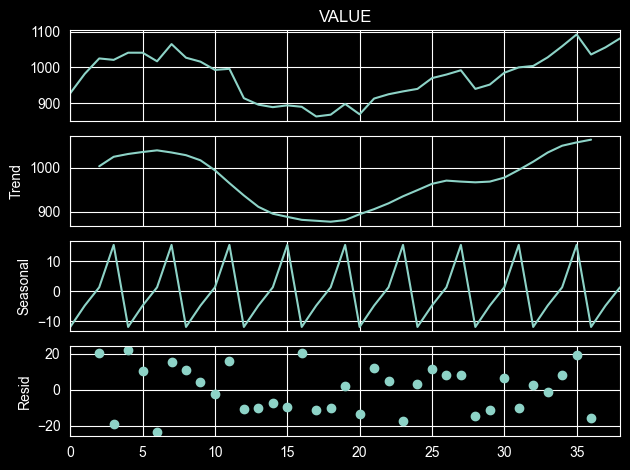

In [6]:
seasons = seasonal_decompose(first_quarterly['VALUE'], model='additive', period=4)

plt.figure(figsize=(12, 8))
seasons.plot()
plt.show()

### Stationary test

With a p-value of 0.0298 the data can be considered as stationary

In [7]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value", result[1])

adf_test(first_quarterly['VALUE'])

ADF Statistic: -1.0405114240834814
p-value 0.7382035342796409


### Memory analysis

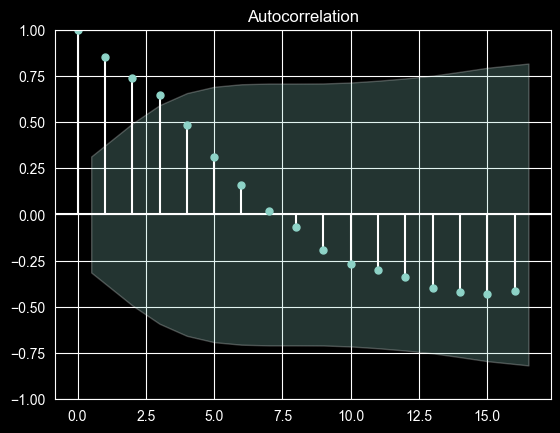

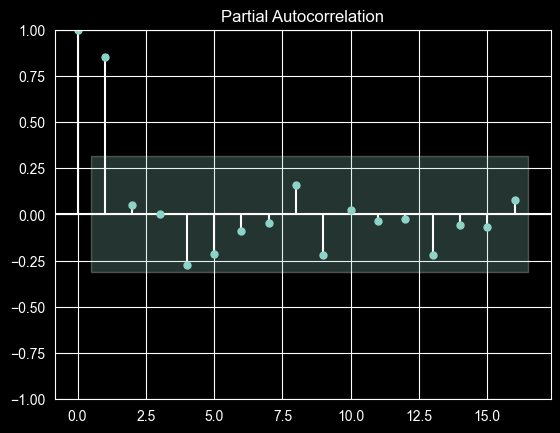

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(first_quarterly['VALUE'])
plot_pacf(first_quarterly['VALUE'])
plt.show()

### Stability of seasonal cycles